In [2]:
print("Jupyter Notebook")

Jupyter Notebook


In [66]:
import pandas as pd
import itertools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
import os
import seaborn as sns
from wordcloud import WordCloud


In [67]:
df=pd.read_csv("E:/Malicious_urls/malicious_phish.csv")
print(df.shape)
df.head()

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [68]:
df.type.value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

# Plotting Wordcloud to determine distribution of different keywords

In [69]:
# subset of dataframe based on classes 
df_phish = df[df.type=='phishing']
df_malware = df[df.type=='malware']
df_deface = df[df.type == 'defacement']
df_benign = df[df.type == 'benign']

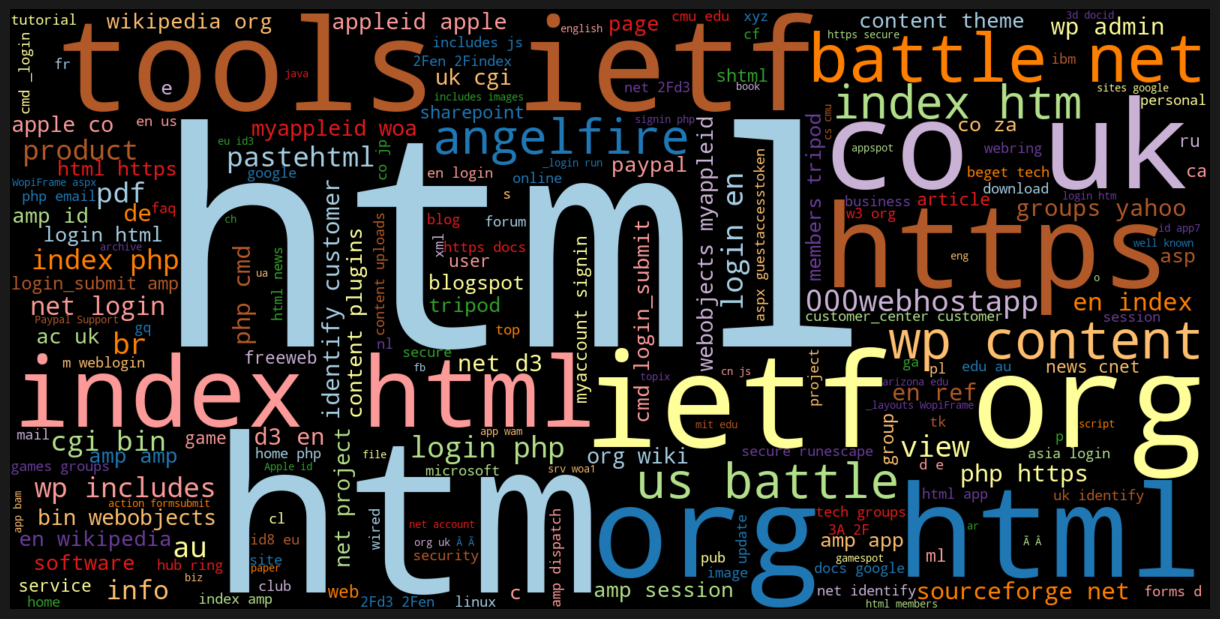

In [70]:
phish_url = " ".join(i for i in df_phish.url) #`join` concatenates elements of the column 'url' in a single variable from the dataframe phish after iteration which are then separated by" "
wordcloud = WordCloud(width=1600, height=800, colormap='Paired').generate(phish_url) #.generate() method generates word cloud based on the input text.
plt.figure(figsize=(12,14),facecolor='k') # facecolor 'k' sets the background as black
plt.imshow(wordcloud, interpolation='bilinear') # bilinear interpolation method smoothes the image when resized
plt.axis("off")
plt.tight_layout(pad=0) # controls the spaces between subplots so that they don't overlap. Here, padding is 0 means no space
plt.show()

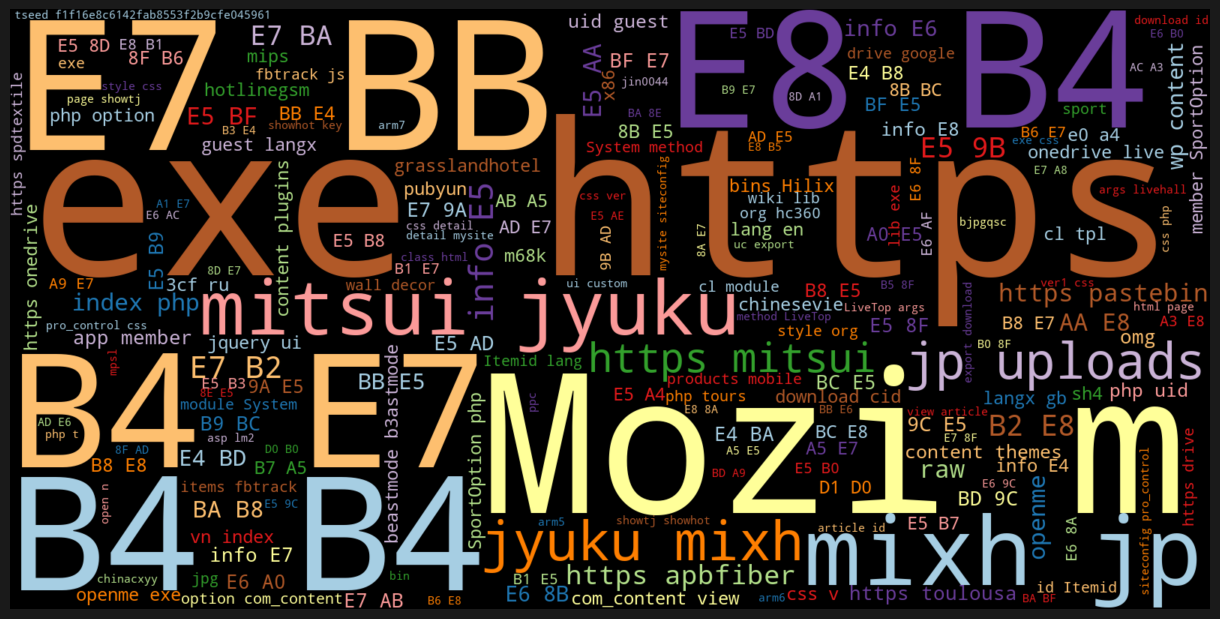

In [71]:
malware_url = " ".join(i for i in df_malware.url) 
wordcloud = WordCloud(width=1600, height=800, colormap='Paired').generate(malware_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

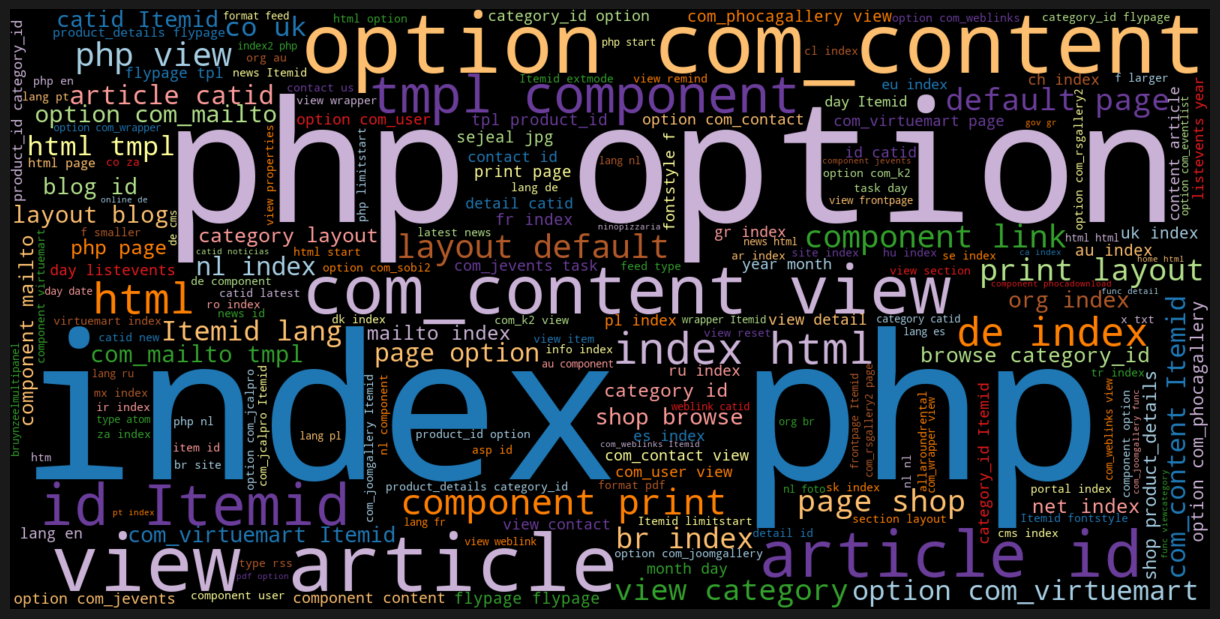

In [72]:
deface_url = " ".join(i for i in df_deface.url) 
wordcloud = WordCloud(width=1600, height=800, colormap='Paired').generate(deface_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

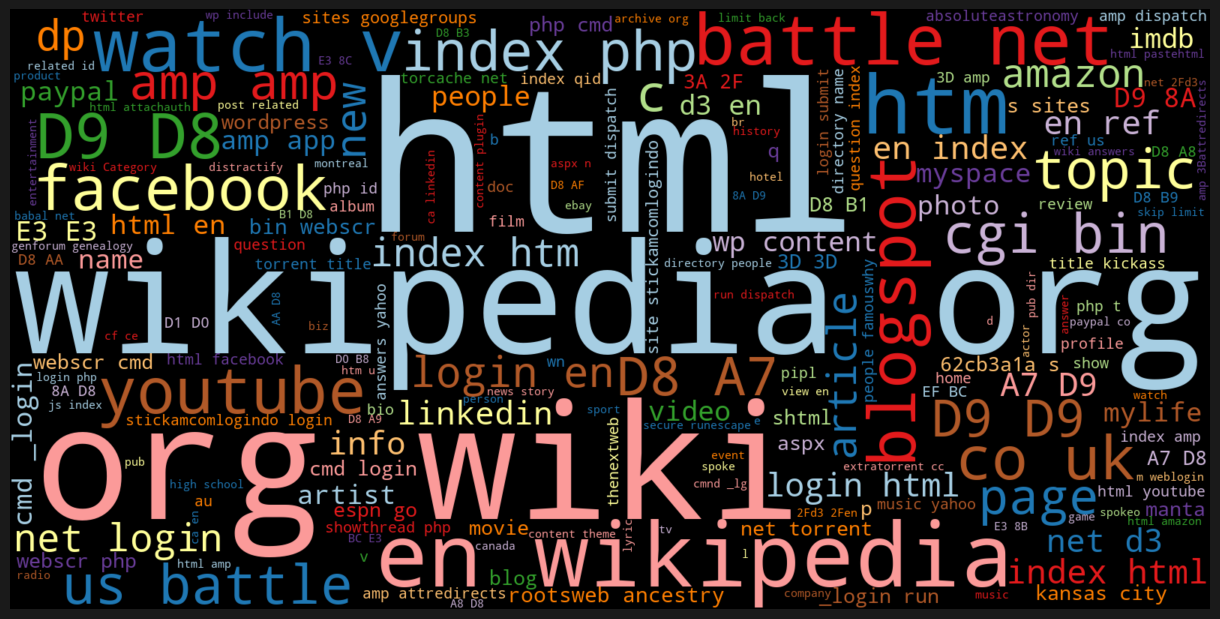

In [73]:
benign_url = " ".join(i for i in df_benign.url)
wordcloud = WordCloud(width=1600, height=800, colormap='Paired').generate(benign_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [74]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
                     '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
                     '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'   #ipv4
                     '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
                     '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1-4}',url)   #ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'no matching pattern found'
        return 0
# Applying the Function to a DataFrame Column:

df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i)) 

# This line applies the having_ip_address function to each element (URL) in a DataFrame column named 'url'. This new column
# will contain 1 if the URL contains an IP address and 0 if it does not.

    

In [75]:
print(df.head())

                                                 url        type  use_of_ip
0                                   br-icloud.com.br    phishing          0
1                mp3raid.com/music/krizz_kaliko.html      benign          0
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0


In [76]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        
        return 1
    else:
        return 0

df['use_of_url'] = df['url'].apply(lambda i: abnormal_url(i))
    
    

In [77]:
print(df.head())

                                                 url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   use_of_url  
0           0  
1           0  
2           0  
3           1  
4           1  


In [78]:
pip install googlesearch.python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [79]:
from googlesearch import search

In [80]:
def google_index(url):
    site = search(url, 5) #The argument 5 specifies the number of search results to fetch from Google. which means the code will retrieve the first 5 search results for the given URL.
    if site:
        
        return 1
    else:
        return 0
df['google_in'] = df['url'].apply(lambda i: google_index(i))

In [81]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot
df['count.']=df['url'].apply(lambda i: count_dot(i)) # the argument of lambda function i denotes each url of the column 'url'
df.head()

,url,type,use_of_ip,use_of_url,google_in,count.
0,br-icloud.com.br,phishing,0,0,1,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2


In [82]:
def count_www(url):
    count_www = url.count('www')
    return count_www
df['count-www'] = df['url'].apply(lambda i : count_www(i))

In [83]:
def count_atrate(url):
    count_atrate=url.count('@')
    return count_atrate
df['count-@'] = df['url'].apply(lambda i : count_atrate(i))

# no. of directories

def no_of_dirs(url):
    no_of_dirs= url.count('/')
    return no_of_dirs
df['no-of-dirs'] = df['url'].apply(lambda i : no_of_dirs(i))


In [84]:
print(df.head())

                                                 url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   use_of_url  google_in  count.  count-www  count-@  no-of-dirs  
0           0          1       2          0        0           0  
1           0          1       2          0        0           2  
2           0          1       2          0        0           3  
3           1          1       3          1        0           3  
4           1          1       2          0        0           3  


In [85]:
def no_of_embeds(url):
    no_of_dirs = urlparse(url).path
    no_of_em = no_of_dirs.count('//')
    return no_of_em
df['no-of-embeds'] = df['url'].apply(lambda i: no_of_embeds(i))
print(df.head(10))

                                                 url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   
5  http://buzzfil.net/m/show-art/ils-etaient-loin...      benign          0   
6      espn.go.com/nba/player/_/id/3457/brandon-rush      benign          0   
7     yourbittorrent.com/?q=anthony-hamilton-soulife      benign          0   
8       http://www.pashminaonline.com/pure-pashminas  defacement          0   
9      allmusic.com/album/crazy-from-the-heat-r16990      benign          0   

   use_of_url  google_in  count.  count-www  count-@  no-of-dirs  no-of-embeds  
0           0          1       2          0      

In [91]:
    
def shortening_service(url):
    match = re.search(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|wit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|lurl\.com|tweez\.me|v\.gd|'
                      r'tr\.im|link\.zip\.net', url)
    if match:
        return 1
    else:
        return 0

df['short-url'] = df['url'].apply(lambda i: shortening_service(i))
print(df.head())








                                                 url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   use_of_url  google_in  count.  count-www  count-@  no-of-dirs  \
0           0          1       2          0        0           0   
1           0          1       2          0        0           2   
2           0          1       2          0        0           3   
3           1          1       3          1        0           3   
4           1          1       2          0        0           3   

   no-of-embeds  short-url  
0             0          0  
1             0          0  
2             0          0  


In [137]:
print(df['short-url'].unique())
print(df['use_of_ip'].unique())
print(df['count-@'].unique())

[0 1]
[0 1]
[ 0  1  2  3  6  4 10]


In [93]:
def count_https(url):
    c_https=url.count('https')
    return c_https

df['count-https']=df['url'].apply(lambda i: count_https(i))

def count_http(url):
    c_http =url.count('http')
    return c_http
df['count-http']=df['url'].apply(lambda i: count_http(i))

def count_percent(url):
    p_count=url.count('%')
    return p_count
df['percent-count'] = df['url'].apply(lambda i: count_percent(i))

def count_question(url):
    q_count=url.count('?')
    return q_count
df['question-count'] = df['url'].apply(lambda i: count_question(i))

def count_hyphen(url):
    h_count=url.count('-')
    return h_count
df['hyphen-count'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    e_count=url.count('=')
    return e_count
df['equal-count'] = df['url'].apply(lambda i: count_equal(i))

def url_length(url):
    return len(str(url))
df['url-length']=df['url'].apply(lambda i: url_length(i))

def hostname_length(url):
    return len(str(urlparse(url).netloc)) #  retrieves the network location (hostname) from the parsed URL.
df['hostname-length'] = df['url'].apply(lambda i:hostname_length(i))

In [94]:
print(df.head())

                                                 url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   use_of_url  google_in  count.  count-www  count-@  no-of-dirs  \
0           0          1       2          0        0           0   
1           0          1       2          0        0           2   
2           0          1       2          0        0           3   
3           1          1       3          1        0           3   
4           1          1       2          0        0           3   

   no-of-embeds  short-url  count-https  count-http  percent-count  \
0             0          0            0       

In [95]:
def suspicious_words(url):
    match = re.search('Paypal|bkash|nagad|login|signin|bank|account|update|free|lucky|service|webscr', url)
    
    if match:
        return 1
    else:
        return 0
    
df['sus-url'] = df['url'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits=digits+1
    return digits

df['digit-counts'] = df['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters+1;
    return letters
df['letter-counts'] = df['url'].apply(lambda i : letter_count(i))

df.head()



,url,type,use_of_ip,use_of_url,google_in,count.,count-www,count-@,no-of-dirs,no-of-embeds,...,count-http,percent-count,question-count,hyphen-count,equal-count,url-length,hostname-length,sus-url,digit-counts,letter-counts
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,0,0,1,0,16,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,0,0,0,35,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,0,0,0,31,0,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,3,0,...,1,0,1,1,4,88,21,0,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,3,0,...,1,0,1,1,3,235,23,0,22,199


In [96]:
pip install tld

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [97]:
from urllib.parse import urlparse
from tld import get_tld
import tldextract
import os.path

#first directory length
def fd_length(url):
    urlpath = urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
df['fd-length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain

# df['tld']=df['url'].apply(lambda i: get_tld(i, fail_silently=True))
def extract_tld(url):
    extracted = tldextract.extract(url)
    return extracted.suffix

df['tld'] = df['url'].apply(lambda i: extract_tld(i))

def tld_length(tld):
   
        return len(tld)
    
    
df['tld-length'] = df['tld'].apply(lambda i : tld_length(i))

df.head(20)

,url,type,use_of_ip,use_of_url,google_in,count.,count-www,count-@,no-of-dirs,no-of-embeds,...,hyphen-count,equal-count,url-length,hostname-length,sus-url,digit-counts,letter-counts,fd-length,tld,tld-length
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,1,0,16,0,0,0,13,0,com.br,6
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,35,0,0,1,29,5,com,3
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,31,0,0,1,25,7,org,3
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,3,0,...,1,4,88,21,0,7,63,9,be,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,3,0,...,1,3,235,23,0,22,199,9,net,3
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,1,1,2,0,0,5,0,...,16,0,118,11,0,1,93,1,net,3
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,0,1,2,0,0,6,0,...,1,0,45,0,0,4,31,3,com,3
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,0,1,1,0,0,1,0,...,2,1,46,0,0,0,40,0,com,3
8,http://www.pashminaonline.com/pure-pashminas,defacement,0,1,1,2,1,0,3,0,...,1,0,44,22,0,0,37,14,com,3
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,0,1,1,0,0,2,0,...,4,0,45,0,0,5,33,5,com,3


In [98]:
df.columns

Index(['url', 'type', 'use_of_ip', 'use_of_url', 'google_in', 'count.',
       'count-www', 'count-@', 'no-of-dirs', 'no-of-embeds', 'short-url',
       'count-https', 'count-http', 'percent-count', 'question-count',
       'hyphen-count', 'equal-count', 'url-length', 'hostname-length',
       'sus-url', 'digit-counts', 'letter-counts', 'fd-length', 'tld',
       'tld-length'],
      dtype='object')

In [99]:
df['type'].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

# Exploratory Data Analysis

# Distribution of use of i_p

In [100]:
import seaborn as sns

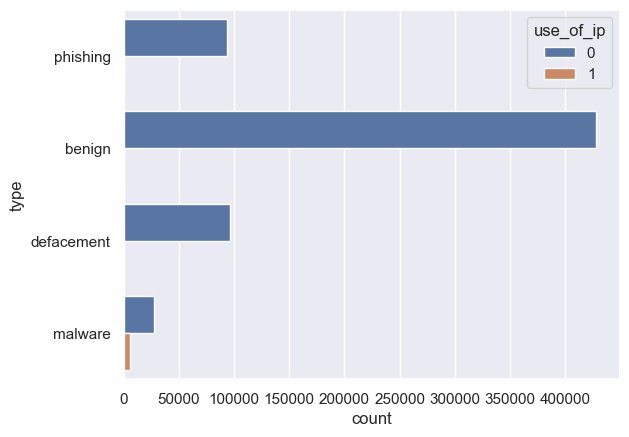

In [101]:
sns.set(style='darkgrid')
ax = sns.countplot(y='type', data=df, hue='use_of_ip')

# Distribution of abnormal url

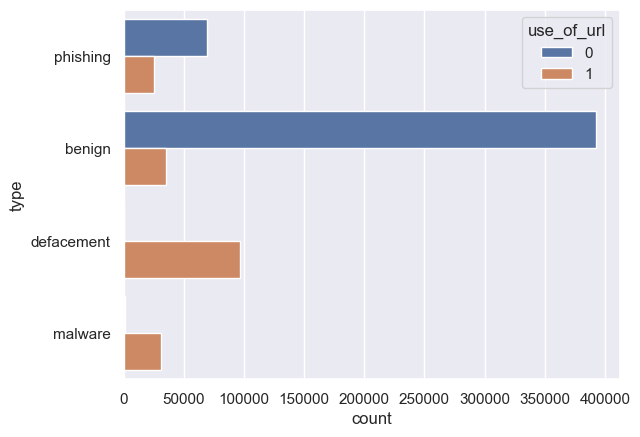

In [102]:
sns.set(style='darkgrid')
ax = sns.countplot(y='type', data=df, hue='use_of_url')

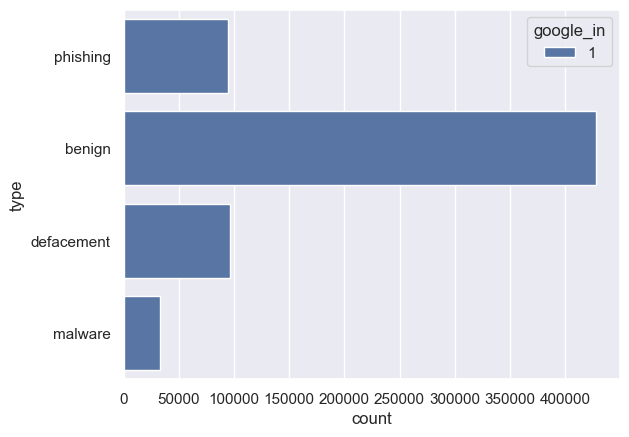

In [105]:
sns.set(style="darkgrid")
ax = sns.countplot(y='type', data=df, hue='google_in')

# Distribution of short url

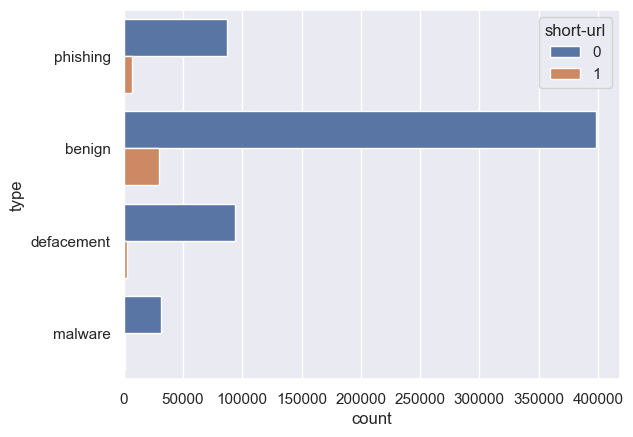

In [106]:
sns.set(style='darkgrid')
ax = sns.countplot(y='type', data=df, hue='short-url')

# Distribution of suspicious url

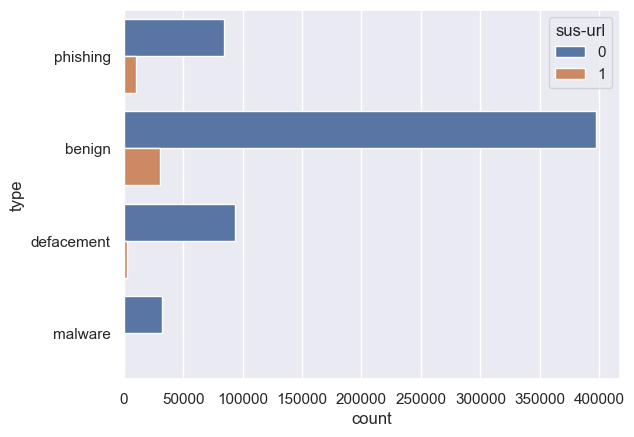

In [107]:
sns.set(style='darkgrid')
ax = sns.countplot(y='type', data=df, hue='sus-url')

# Distribution of count of [.] dot

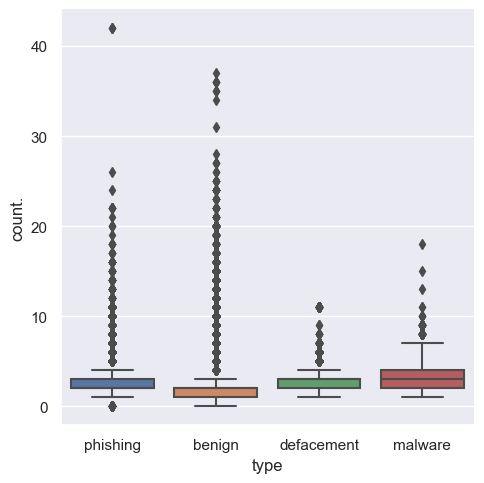

In [108]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count.", kind="box", data=df)

# Distribution of www

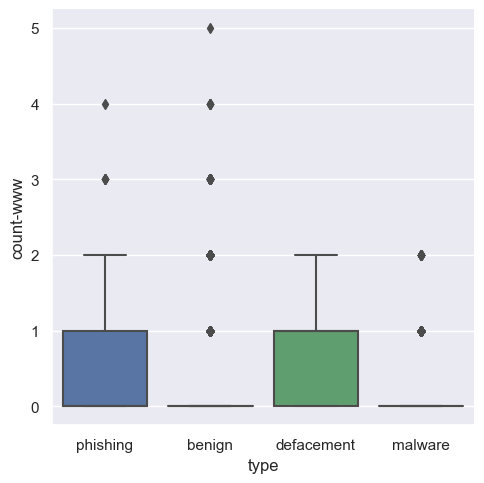

In [109]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-www", kind="box", data=df)

# Distribution of count@

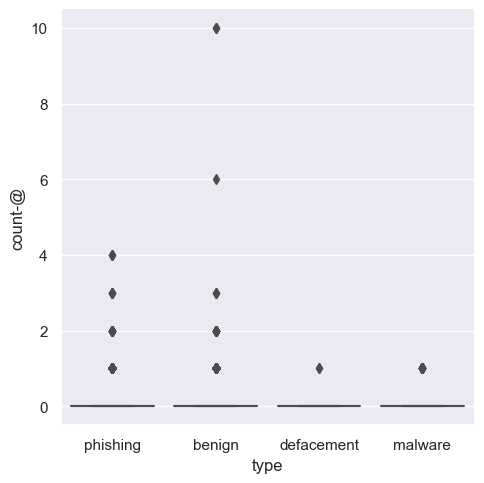

In [110]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-@", kind="box", data=df)

# Distribution of count-dir

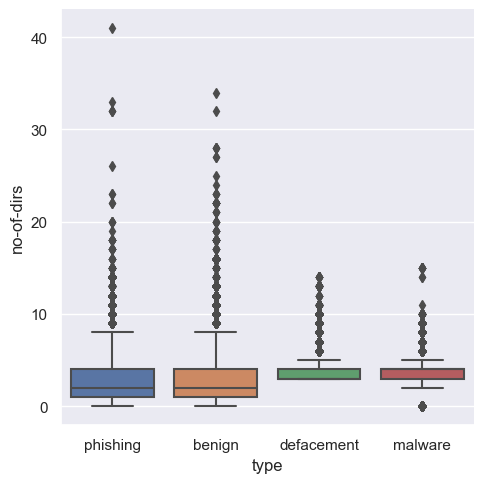

In [111]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="no-of-dirs", kind="box", data=df)

# Distribution of hostname lengths

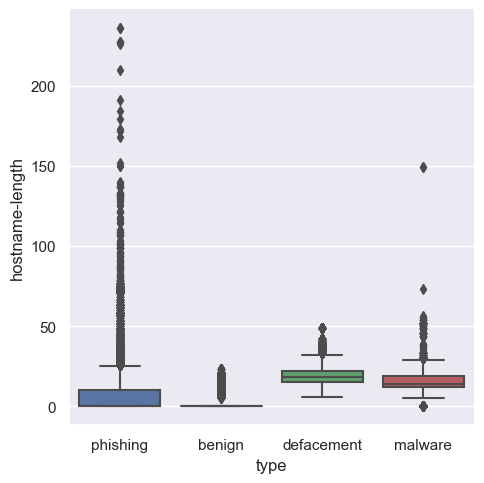

In [112]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="hostname-length", kind="box", data=df)

# Distribution of first directory length

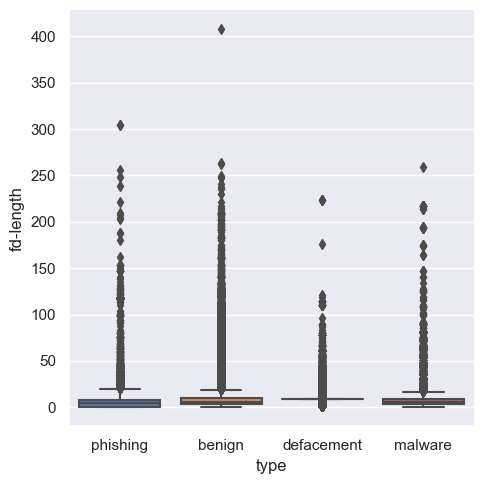

In [113]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="fd-length", kind="box", data=df)

# Distribution of TLD length

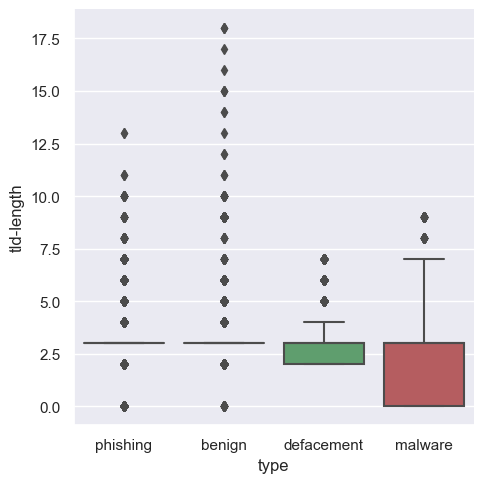

In [114]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="tld-length", kind="box", data=df)

# Target Encoding

In [115]:
from sklearn.preprocessing import LabelEncoder

# it is used to determine the frequencies of each type of websites

lb_make = LabelEncoder()
df['type_code'] = lb_make.fit_transform(df['type'])
df['type_code'].value_counts()

0    428103
1     96457
3     94111
2     32520
Name: type_code, dtype: int64

In [116]:
df.head()

,url,type,use_of_ip,use_of_url,google_in,count.,count-www,count-@,no-of-dirs,no-of-embeds,...,equal-count,url-length,hostname-length,sus-url,digit-counts,letter-counts,fd-length,tld,tld-length,type_code
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,16,0,0,0,13,0,com.br,6,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,35,0,0,1,29,5,com,3,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,31,0,0,1,25,7,org,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,3,0,...,4,88,21,0,7,63,9,be,2,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,3,0,...,3,235,23,0,22,199,9,net,3,1


In [117]:
df.columns

Index(['url', 'type', 'use_of_ip', 'use_of_url', 'google_in', 'count.',
       'count-www', 'count-@', 'no-of-dirs', 'no-of-embeds', 'short-url',
       'count-https', 'count-http', 'percent-count', 'question-count',
       'hyphen-count', 'equal-count', 'url-length', 'hostname-length',
       'sus-url', 'digit-counts', 'letter-counts', 'fd-length', 'tld',
       'tld-length', 'type_code'],
      dtype='object')

In [118]:
df.drop(['google_in', 'tld'], 1)

C:\Users\acer\AppData\Local\Temp\ipykernel_10692\802433581.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['google_in', 'tld'], 1)


,url,type,use_of_ip,use_of_url,count.,count-www,count-@,no-of-dirs,no-of-embeds,short-url,...,hyphen-count,equal-count,url-length,hostname-length,sus-url,digit-counts,letter-counts,fd-length,tld-length,type_code
0,br-icloud.com.br,phishing,0,0,2,0,0,0,0,0,...,1,0,16,0,0,0,13,0,6,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0,2,0,0,...,0,0,35,0,0,1,29,5,3,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0,3,0,0,...,0,0,31,0,0,1,25,7,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0,3,0,0,...,1,4,88,21,0,7,63,9,2,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0,3,0,0,...,1,3,235,23,0,22,199,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,0,3,0,0,3,0,0,...,0,0,39,0,0,12,21,7,3,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,0,2,0,0,4,0,1,...,2,0,44,0,0,7,29,8,3,3
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,0,2,1,0,4,0,1,...,0,0,42,0,0,3,33,7,3,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,0,2,0,0,2,0,0,...,0,0,45,0,0,0,36,4,3,3


In [119]:
df.head()

,url,type,use_of_ip,use_of_url,google_in,count.,count-www,count-@,no-of-dirs,no-of-embeds,...,equal-count,url-length,hostname-length,sus-url,digit-counts,letter-counts,fd-length,tld,tld-length,type_code
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,16,0,0,0,13,0,com.br,6,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,35,0,0,1,29,5,com,3,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,31,0,0,1,25,7,org,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,3,0,...,4,88,21,0,7,63,9,be,2,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,3,0,...,3,235,23,0,22,199,9,net,3,1


In [120]:
df.drop(['tld'],1)

C:\Users\acer\AppData\Local\Temp\ipykernel_10692\1616422433.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['tld'],1)


,url,type,use_of_ip,use_of_url,google_in,count.,count-www,count-@,no-of-dirs,no-of-embeds,...,hyphen-count,equal-count,url-length,hostname-length,sus-url,digit-counts,letter-counts,fd-length,tld-length,type_code
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,1,0,16,0,0,0,13,0,6,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,35,0,0,1,29,5,3,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,31,0,0,1,25,7,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,3,0,...,1,4,88,21,0,7,63,9,2,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,3,0,...,1,3,235,23,0,22,199,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,0,1,3,0,0,3,0,...,0,0,39,0,0,12,21,7,3,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,0,1,2,0,0,4,0,...,2,0,44,0,0,7,29,8,3,3
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,0,1,2,1,0,4,0,...,0,0,42,0,0,3,33,7,3,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,0,1,2,0,0,2,0,...,0,0,45,0,0,0,36,4,3,3


In [121]:
df.head()

,url,type,use_of_ip,use_of_url,google_in,count.,count-www,count-@,no-of-dirs,no-of-embeds,...,equal-count,url-length,hostname-length,sus-url,digit-counts,letter-counts,fd-length,tld,tld-length,type_code
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,16,0,0,0,13,0,com.br,6,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,35,0,0,1,29,5,com,3,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,31,0,0,1,25,7,org,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,3,0,...,4,88,21,0,7,63,9,be,2,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,3,0,...,3,235,23,0,22,199,9,net,3,1


# Creation of feature and target

In [122]:
# Predictor Variables

X= df[['use_of_ip', 'use_of_url', 'count.', 'count-https',
       'count-http', 'percent-count', 'question-count', 'hyphen-count',
       'equal-count', 'url-length', 'hostname-length', 'sus-url',
       'digit-counts', 'letter-counts', 'fd-length', 'tld-length',
       'count-www', 'no-of-dirs', 'no-of-embeds', 'short-url']]

# Target variable
y=df['type_code']


# Train test split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=5 )

 # Model Building

# 1. Random Forest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100,max_features='sqrt')

rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf,target_names=['benign','phishing','defacement', 'malware']))
score = accuracy_score(y_test, y_pred_rf)
print("Accuracy: %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
    phishing       0.98      0.99      0.99     19292
  defacement       0.99      0.95      0.97      6504
     malware       0.91      0.87      0.89     18822

    accuracy                           0.97    130239
   macro avg       0.96      0.95      0.96    130239
weighted avg       0.97      0.97      0.97    130239

Accuracy: 0.968


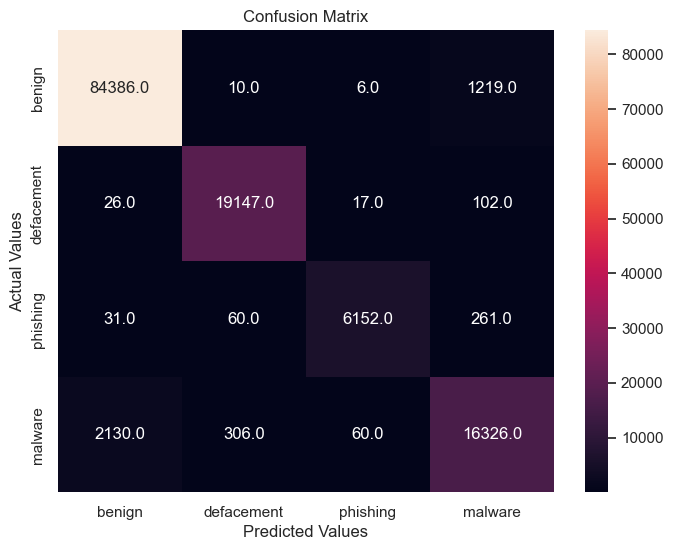

In [125]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm, 
                     index = ['benign', 'defacement', 'phishing', 'malware'],
                     columns = ['benign', 'defacement', 'phishing', 'malware'] )

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='.1f')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()



<Axes: >

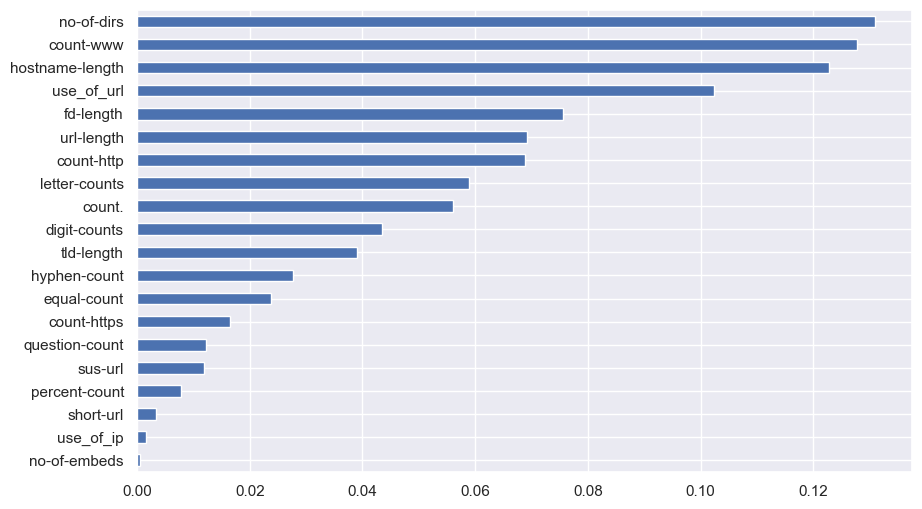

In [126]:
feat_importances = pd.Series(rf.feature_importances_,index = X_train.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,6))

# 2. Light GBM Classifier

In [127]:
lgb = LGBMClassifier(boosting_type= 'gbdt', force_col_wise= True, verbose = 0, random_state=5 )

LGB_C = lgb.fit(X_train, y_train)
y_pred_lgb = LGB_C.predict(X_test)
print(classification_report(y_test, y_pred_lgb, target_names=['benign', 'defacement', 'phishing', 'malware']))

score = accuracy_score(y_test, y_pred_lgb)
print('Accuracy: %0.3f' % score)


              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.96      0.99      0.98     19292
    phishing       0.97      0.90      0.94      6504
     malware       0.91      0.83      0.87     18822

    accuracy                           0.96    130239
   macro avg       0.95      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239

Accuracy: 0.960


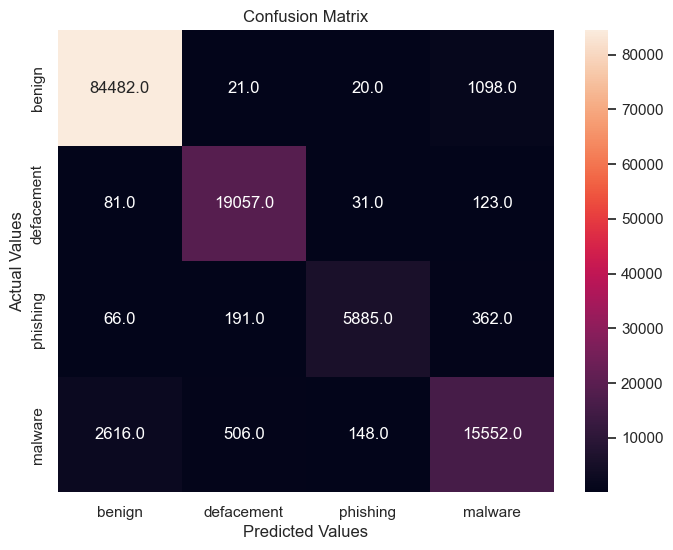

In [128]:
cm = confusion_matrix(y_test, y_pred_lgb)
cm_df = pd.DataFrame(cm, 
                     index = ['benign', 'defacement', 'phishing', 'malware'],
                     columns = ['benign', 'defacement', 'phishing', 'malware'] )

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='.1f')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

<Axes: >

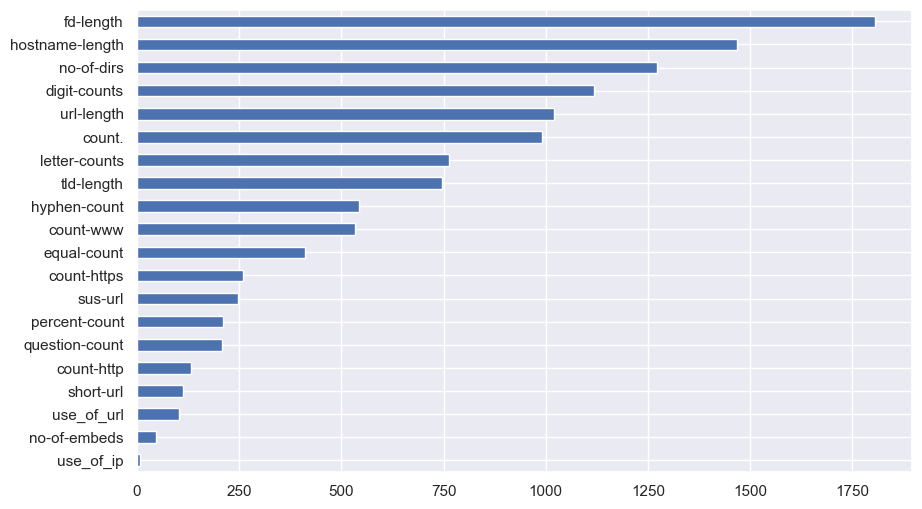

In [129]:
feat_importances = pd.Series(lgb.feature_importances_,index = X_train.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,6))

In [131]:
xgb_c = xgb.XGBClassifier(n_estimators = 100)
xgb_cf = xgb_c.fit(X_train._get_numeric_data(), y_train)
y_pred_xg= xgb_cf.predict(X_test._get_numeric_data())
print(classification_report(y_test, y_pred_xg, target_names=['benign', 'defacement', 'phishing', 'malware']))

score = accuracy_score(y_test, y_pred_xg)

print('Accuracy: %.3f' % score)


              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.97      0.99      0.98     19292
    phishing       0.98      0.92      0.95      6504
     malware       0.91      0.84      0.87     18822

    accuracy                           0.96    130239
   macro avg       0.96      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239

Accuracy: 0.963


Text(67.25, 0.5, 'Actual Values')

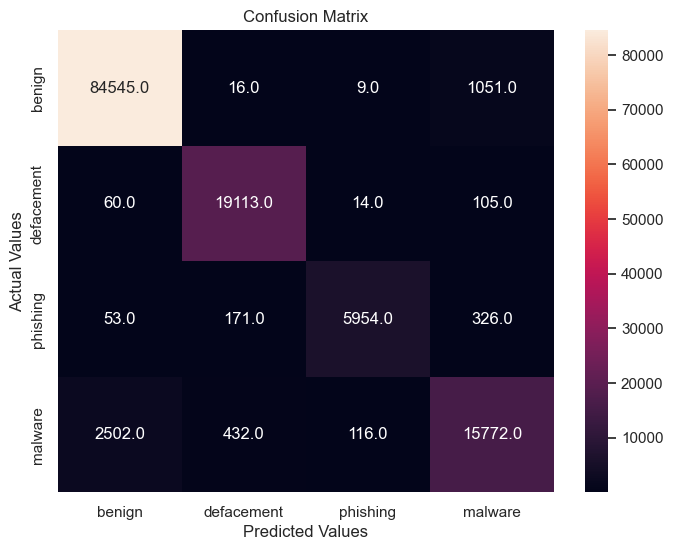

In [132]:
cm = confusion_matrix(y_test, y_pred_xg)
cm_df = pd.DataFrame(cm, index =['benign', 'defacement', 'phishing', 'malware'],
                         columns = ['benign', 'defacement', 'phishing', 'malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot = True, fmt = '.1f' )
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')


<Axes: >

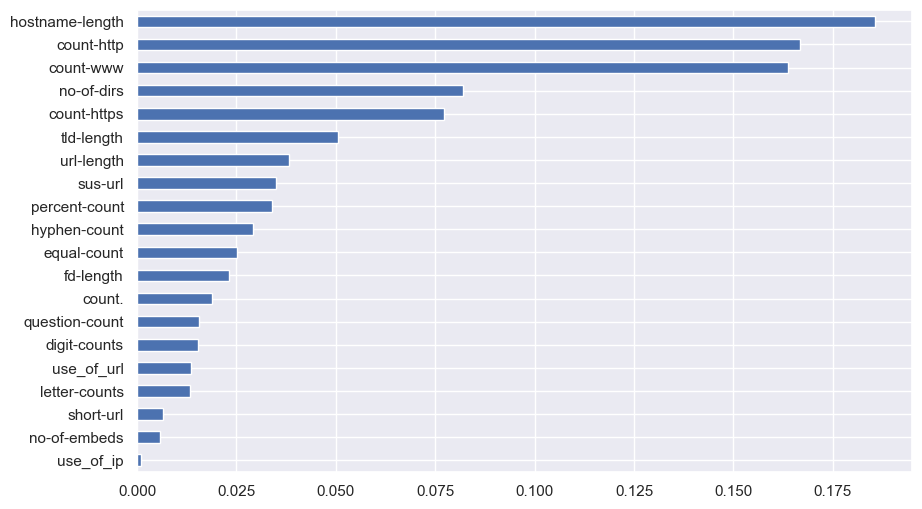

In [133]:
feat_importances = pd.Series(xgb_c.feature_importances_, index= X_train.columns)
feat_importances.sort_values().plot(kind = 'barh', figsize=(10,6))